<a href="https://colab.research.google.com/github/daniloabranches/bootcamp-machine-learning-igti/blob/master/trabalho_pratico_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

2.2.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [28]:
train_images.shape

(60000, 28, 28)

In [29]:
len(train_labels)

60000

In [30]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [31]:
test_images.shape

(10000, 28, 28)

In [32]:
len(test_labels)

10000

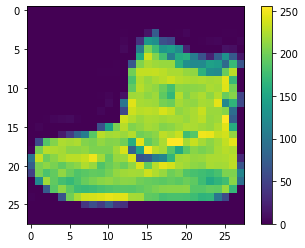

In [41]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [42]:
train_images = train_images / 255.0

test_images = test_images / 255.0

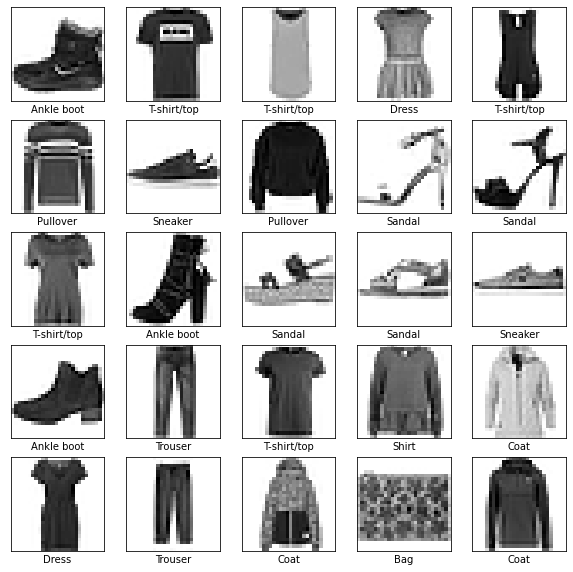

In [46]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [50]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4956 - accuracy: 0.8261
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3727 - accuracy: 0.8657
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3390 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3128 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2934 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2812 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2677 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2573 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2484 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [52]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3343 - accuracy: 0.8832

Test accuracy: 0.8831999897956848


In [53]:
predictions = model.predict(test_images)

In [60]:
predictions[0]

array([2.2140853e-10, 1.2575539e-08, 1.1756598e-08, 3.5972508e-10,
       3.5967247e-09, 8.9808175e-04, 1.0287767e-08, 2.0417832e-03,
       1.8457065e-08, 9.9706012e-01], dtype=float32)

In [61]:
np.argmax(predictions[0])

9

In [69]:
np.max(predictions[0])

0.9970601

In [62]:
class_names[9]

'Ankle boot'

In [63]:
test_labels[0]

9

In [66]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

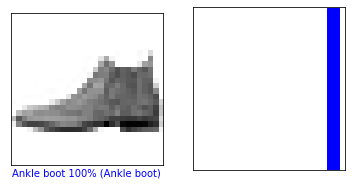

In [67]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

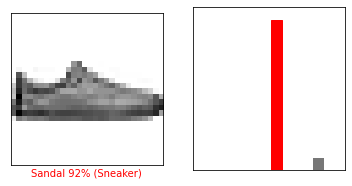

In [83]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

In [71]:
predictions[12]

array([3.3244453e-06, 2.5477094e-11, 3.7904311e-08, 1.2336426e-07,
       3.3850551e-08, 9.2221582e-01, 1.2670620e-07, 3.3258521e-03,
       7.4454658e-02, 4.7413047e-09], dtype=float32)

In [81]:
np.argmax(predictions[12])

5

In [82]:
np.max(predictions[12])

0.9222158

In [80]:
test_labels[12]

7

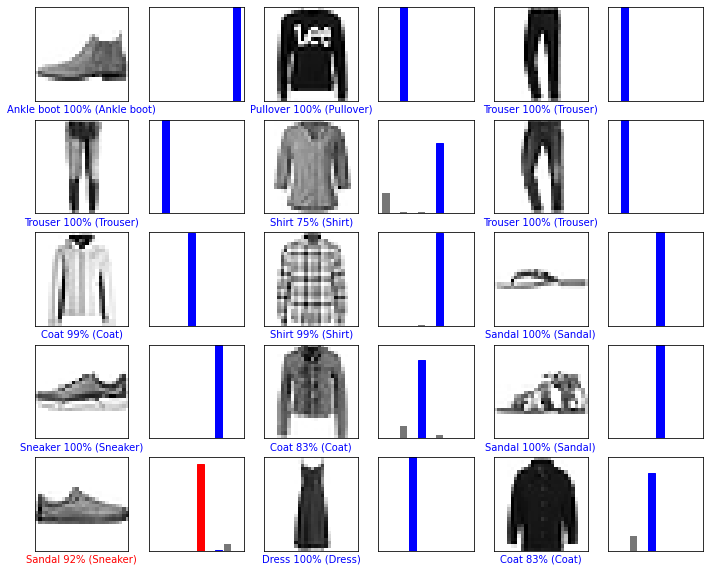

In [84]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [102]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [85]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


In [86]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [87]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.2140810e-10 1.2575563e-08 1.1756643e-08 3.5972578e-10 3.5967316e-09
  8.9808088e-04 1.0287767e-08 2.0417832e-03 1.8457028e-08 9.9706012e-01]]


In [90]:
len(predictions_single)

1

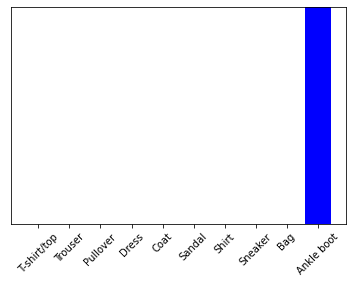

In [88]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [89]:
np.argmax(predictions_single[0])

9